<a href="https://colab.research.google.com/github/micaelakorol21/water_quality/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Clasificación de Agua Potable</h1>
<h2>🚰El objetivo de este proyecto es predecir si una muestra de agua es potable basándonos en características físico-químicas y ambientales.</h2>

In [23]:
df = pd.read_csv('https://media.githubusercontent.com/media/micaelakorol21/dataset_water_quality/refs/heads/main/Water_quality.csv')

<p style="font-size:20px;">🔍Exploración de los datos:</p>

In [20]:
df.shape
# El dataset poseé: 24 columnas y 698.575 filas.

(698575, 24)

In [124]:
# Tipos de datos de cada columna:
df.dtypes

Index                       int64
pH                        float64
Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Color                      object
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Source                     object
Water Temperature         float64
Air Temperature           float64
Month                      object
Day                       float64
Time of Day               float64
Target                      int64
dtype: object

In [126]:
# Columnas que tienen datos faltantes
df.isna().sum()

Index                         0
pH                            0
Iron                       4439
Nitrate                   11880
Chloride                  19525
Lead                       2962
Zinc                      17566
Color                       627
Turbidity                  5549
Fluoride                  20939
Copper                    22091
Odor                      19772
Sulfate                   21693
Conductivity              18263
Chlorine                   6370
Manganese                 12178
Total Dissolved Solids      192
Source                     9802
Water Temperature         18811
Air Temperature            3393
Month                     10738
Day                       11049
Time of Day               12913
Target                        0
dtype: int64

In [128]:
max_missing = df.isna().sum().max()  # Calculo el maximo valor faltante
print(f"El valor maximo de faltantes es de {max_missing}")

El valor maximo de faltantes es de 22091


<p>Renombramos las columnas</p>

In [133]:
df = df.rename(columns={
    'Index': 'Índice',
    'pH': 'pH',
    'Iron': 'Plata',
    'Nitrate': 'Nitrato',
    'Chloride': 'Cloruros',
    'Lead': 'Plomo',
    'Zinc': 'Zinc',
    'Color': 'Color',
    'Turbidity': 'Turbidez',
    'Fluoride': 'Fluoruro',
    'Copper': 'Cobre',
    'Odor': 'Olor',
    'Sulfate': 'Sulfatos',
    'Conductivity': 'Conductividad',
    'Chlorine': 'Cloro residual libre',
    'Manganese': 'Manganeso',
    'Total Dissolved Solids': 'Sólidos disueltos totales',
    'Source': 'Fuente',
    'Water Temperature': 'Temperatura del agua',
    'Air Temperature': 'Temperatura del aire',
    'Month': 'Mes',
    'Day': 'Día',
    'Time of Day': 'Hora del día',
    'Target': 'Objetivo'
})

<b style="font-size:16px">El conjunto de datos incluye 24 columnas, de las cuales 23 son variables predictoras y 1 es la variable objetivo que indica si el agua <b style='color:red'> es potable (1) o no (0)  </b> .</b>

In [172]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo'],
      dtype='object')

<b style="font-size:16px;"> Análisis de la variable objetivo: Objetivo</b>

In [175]:
# Conteo de clases
df['Objetivo'].value_counts()

Objetivo
0    390435
1    163528
Name: count, dtype: int64

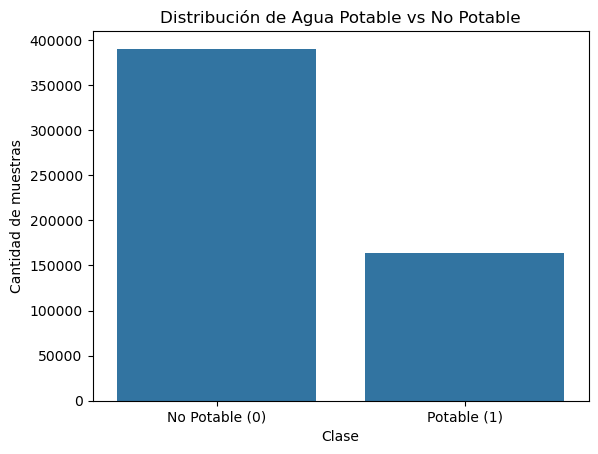

In [177]:
sns.countplot(data=df, x='Objetivo')
plt.title('Distribución de Agua Potable vs No Potable')
plt.xticks([0, 1], ['No Potable (0)', 'Potable (1)'])
plt.ylabel('Cantidad de muestras')
plt.xlabel('Clase')
plt.show()

<b style='font-size:16px'>El dataset está desbalanceado: hay más muestras de agua no potable (457841) que de agua potable (240734).</b>

<b style="font-size:22px">Limpieza de los datos de la columna pH </b>

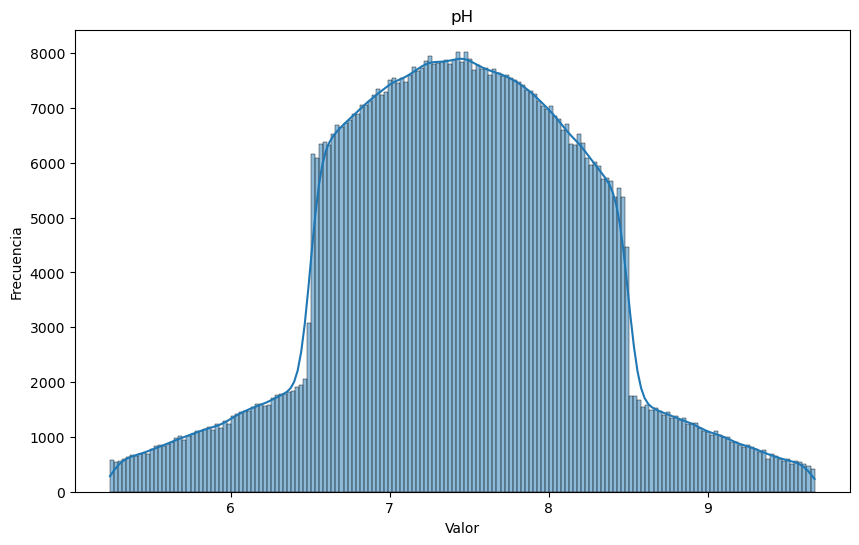

In [147]:
# Observamos la distribuición de la columna pH:
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [148]:
df['pH'].describe()

count    664345.000000
mean          7.451333
std           0.791758
min           5.241632
25%           6.902163
50%           7.450813
75%           8.009015
max           9.669486
Name: pH, dtype: float64

In [179]:
#Eliminar outliers de la fila pH

col = 'pH'  # ejemplo
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
df['pH'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['pH'].describe()

count    552687.000000
mean          7.455473
std           0.764056
min           5.289734
25%           6.918272
50%           7.453708
75%           8.000039
max           9.627641
Name: pH, dtype: float64

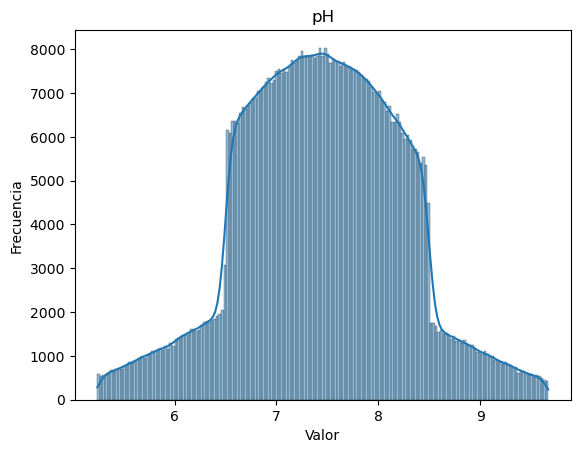

In [150]:
plt.figure()
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de pH 📝 Después de eliminar los valores nulos y los outliers en la columna pH, se observaron variaciones significativas en las estadísticas descriptivas. Se eliminaron aproximadamente 29,870 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, hubo un ligero aumento, pasando de 7.45 a 7.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por debajo del promedio general. La desviación estándar también se redujo notablemente de 0.85 a 0.73, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo cambió de 2.06 a 5.36 y el máximo de 12.89 a 9.57, lo que confirma que se eliminaron los valores más extremos en ambos extremos del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable</p>

In [155]:
ph_nulos = df['pH'].isnull().sum()
print(f"Cantidad de valores nulos en pH: {ph_nulos}")
# Eliminar nulos d la columna pH
df_sinpHnulos = df.dropna(subset=['pH'])

Cantidad de valores nulos en pH: 0


In [156]:
df_sinpHnulos = df_sinpHnulos['pH'].isnull().sum()
df_sinpHnulos
# Hacer mascara: eliminar pH <5 y >10

0

<b style="font-size:22px">Limpieza de los datos de la columna Hierro </b>

In [158]:
df['Plata'].describe()

count    6.598950e+05
mean     1.314991e-01
std      4.848701e-01
min      8.010000e-45
25%      1.010000e-05
50%      2.317150e-03
75%      5.611625e-02
max      1.574860e+01
Name: Plata, dtype: float64

In [163]:
col_p = 'Plata'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    5.539630e+05
mean     1.547120e-02
std      2.999023e-02
min      8.010000e-45
25%      2.530000e-06
50%      5.875960e-04
75%      1.403813e-02
max      1.402737e-01
Name: Plata, dtype: float64


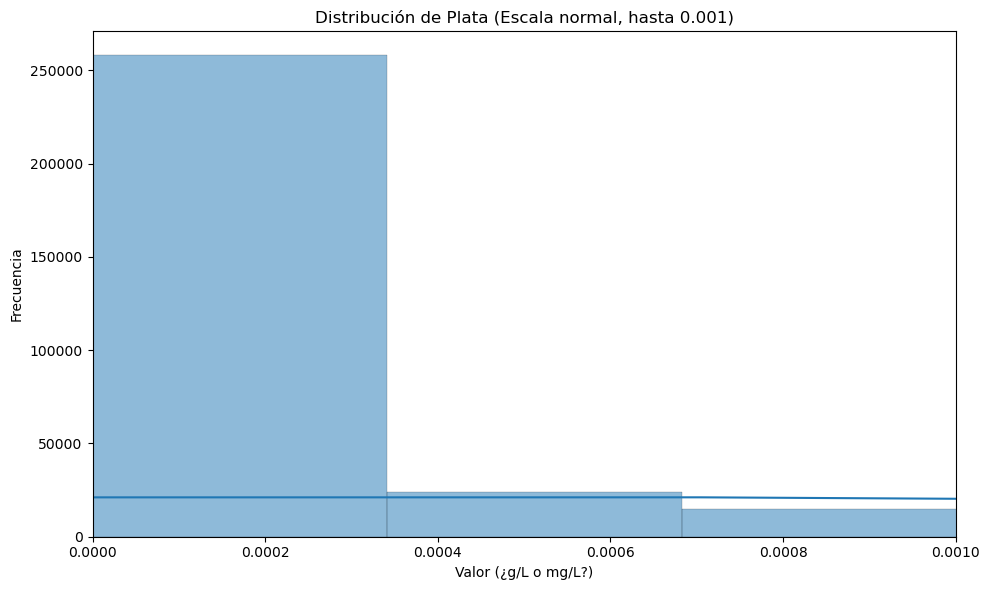

In [165]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma normal acotado hasta 0.001
sns.histplot(df['Plata'], kde=True, ax=ax)

# Acotar eje X para observar mejor valores pequeños
ax.set_xlim(0, 0.001)

# Agregar títulos y etiquetas
ax.set_title('Distribución de Plata (Escala normal, hasta 0.001)')
ax.set_xlabel('Valor (¿g/L o mg/L?)')  # Cambiar al confirmar la unidad
ax.set_ylabel('Frecuencia')

# Ajustar presentación
plt.tight_layout()
plt.show()

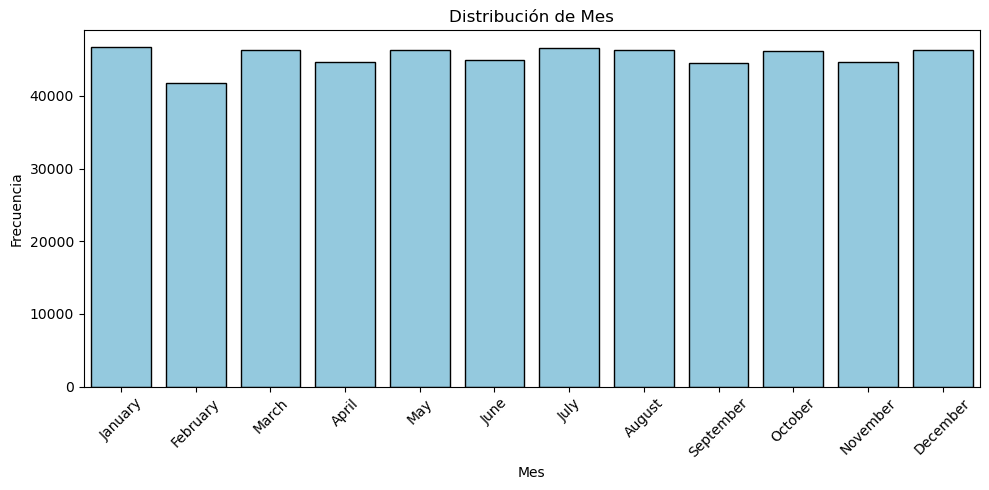

In [167]:
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Mes', order=orden_meses, color='skyblue', edgecolor='black')

plt.title('Distribución de Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rota las etiquetas para mejor lectura
plt.tight_layout()
plt.show()

In [ ]:
# Ver distribuicion de las columnas más relevantes:
columnas = ['pH', 'Total Dissolved Solids', 'Conductivity']

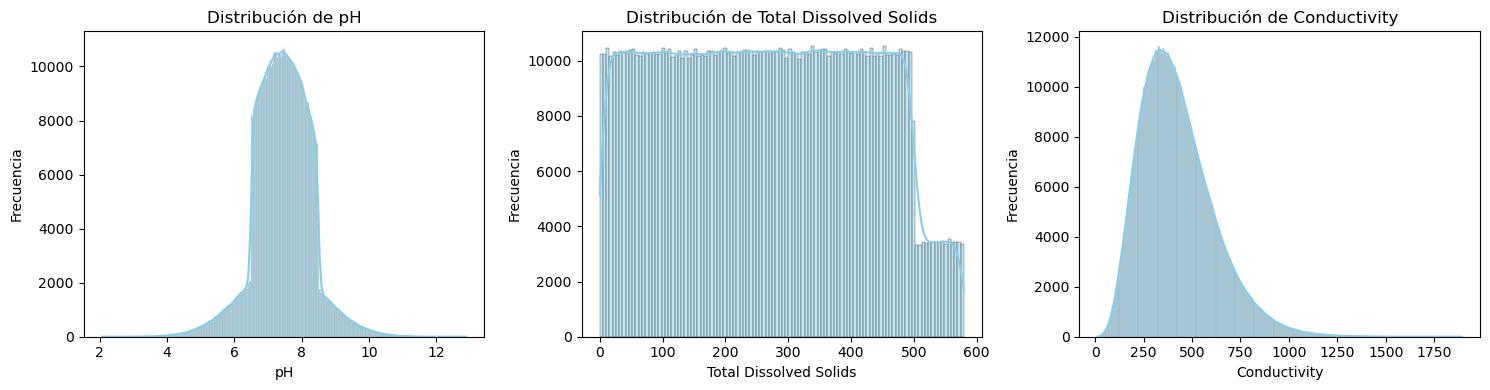

In [ ]:
fig, axes = plt.subplots(1, len(columnas), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()
